In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the data
df = pd.read_excel("sales data.xlsx", sheet_name="sales data")

In [11]:
# --- TRANSFORMATION ---
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [12]:
# Clean 'cost' column (convert to numeric)
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

In [13]:
# Drop rows with missing 'order_value_EUR' or 'date'
df.dropna(subset=['order_value_EUR', 'date'], inplace=True)

In [14]:
# Create 'month' column for monthly aggregation
df['month'] = df['date'].dt.to_period('M')

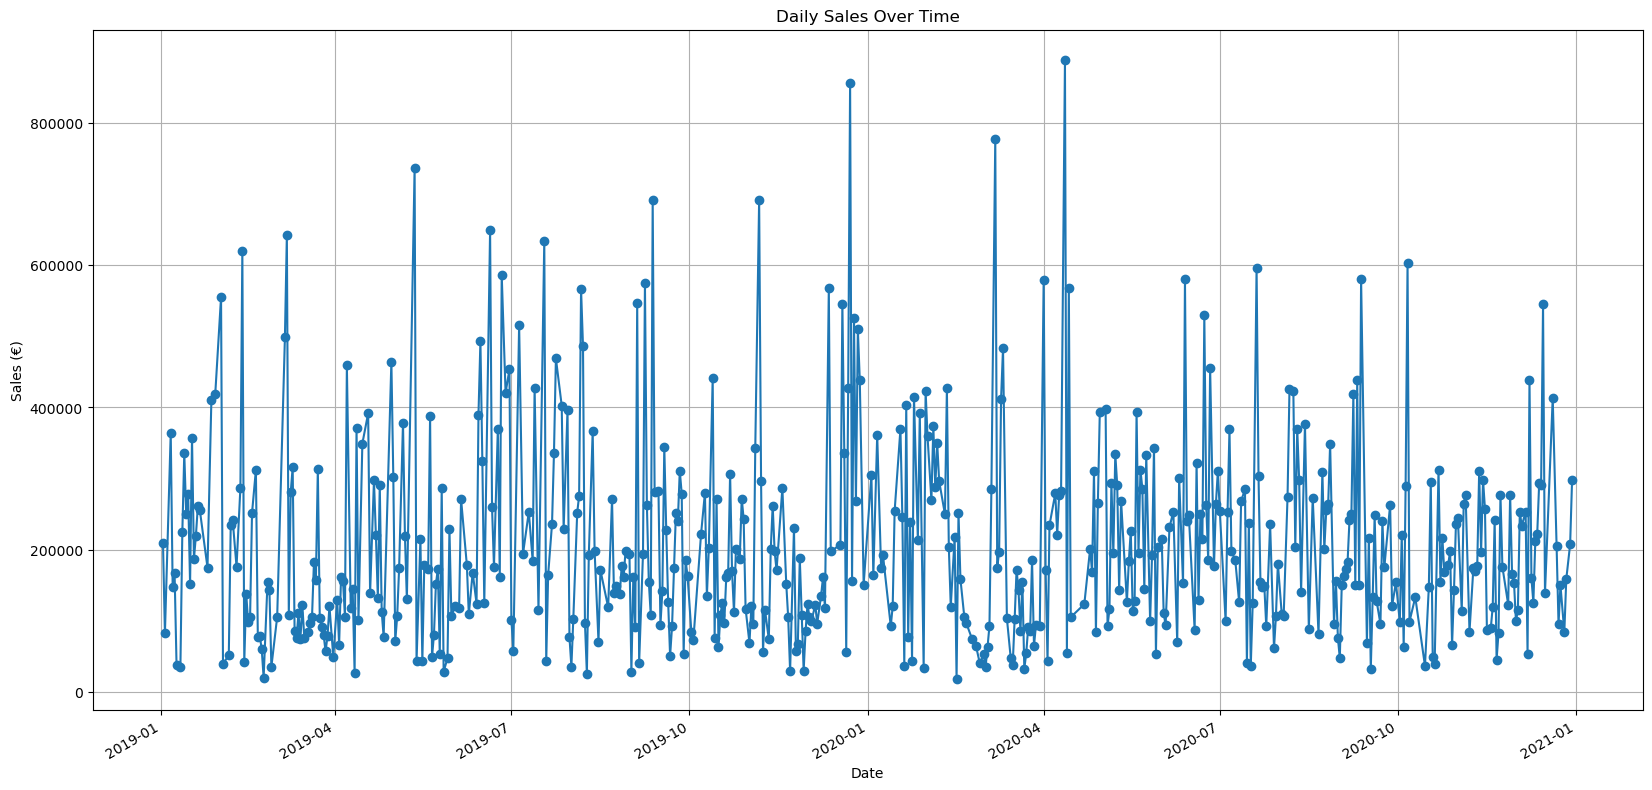

In [50]:
# 1. Sales Over Time
plt.figure(figsize=(20,10))
df.groupby('date')['order_value_EUR'].sum().plot(title='Daily Sales Over Time', marker='o')
plt.xlabel("Date")
plt.ylabel("Sales (€)")
plt.grid()
plt.show()

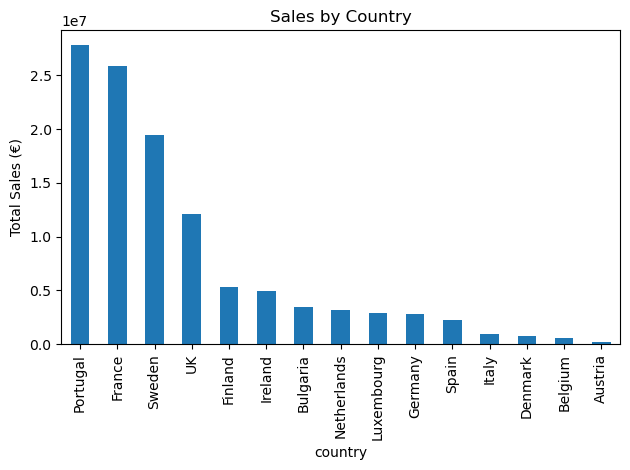

In [54]:
# 2. Sales by Region (Country)
country_sales = df.groupby('country')['order_value_EUR'].sum().sort_values(ascending=False)
country_sales.plot(kind='bar', title='Sales by Country')
plt.ylabel("Total Sales (€)")
plt.tight_layout()
plt.show()

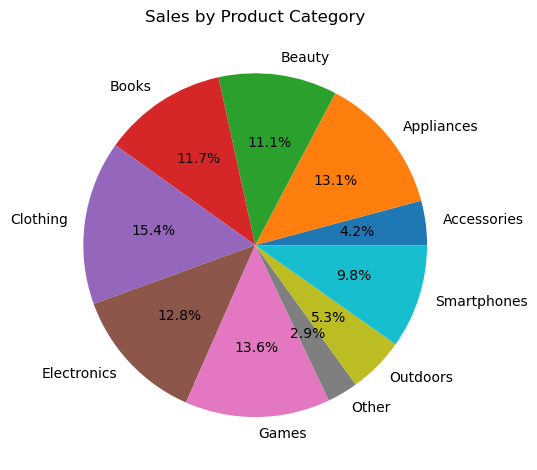

In [28]:
# 3. Product Category Performance
category_sales = df.groupby('category')['order_value_EUR'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Product Category')
plt.ylabel("")
plt.tight_layout()
plt.show()

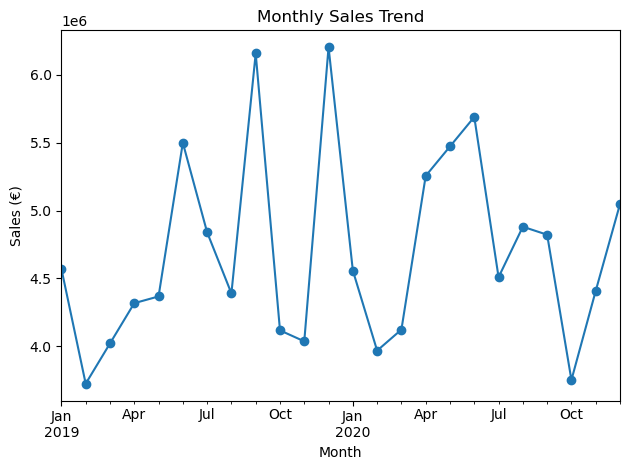

In [20]:
# 4. Monthly Sales Trends
monthly_sales = df.groupby('month')['order_value_EUR'].sum()
monthly_sales.plot(marker='o', title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Sales (€)")
plt.tight_layout()
plt.show()

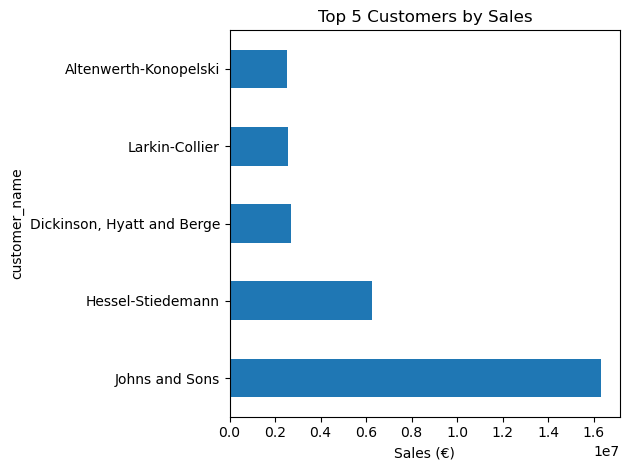

In [22]:
# 5. Top 5 Customers by Sales
top_customers = df.groupby('customer_name')['order_value_EUR'].sum().nlargest(5)
top_customers.plot(kind='barh', title='Top 5 Customers by Sales')
plt.xlabel("Sales (€)")
plt.tight_layout()
plt.show()